In [1]:
#Import all the required libraries
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision import datasets, transforms

In [2]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [15]:
#Define the load data function
def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_data, test_data)

MODEL DEFINITION

In [4]:
#Define the model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [5]:
#Define the function to calculate the parameters
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [6]:
def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-3, momentum=0.9, nesterov=True)

In [7]:
#Define the training function
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [16]:
def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

TRAIN THE MODEL

In [9]:
epochs=28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
        print('Test loss - ', test_loss, ' Epoch - ', epoch)
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [10]:
train_data, test_data = data_loader(75, 75)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

Test loss -  tensor(1.3894)  Epoch -  1
Test loss -  tensor(0.2985)  Epoch -  2
Test loss -  tensor(0.1942)  Epoch -  3
Test loss -  tensor(0.1315)  Epoch -  4
Test loss -  tensor(0.1090)  Epoch -  5
Test loss -  tensor(0.0962)  Epoch -  6
Test loss -  tensor(0.0835)  Epoch -  7
Test loss -  tensor(0.0837)  Epoch -  8
Test loss -  tensor(0.0728)  Epoch -  9
Test loss -  tensor(0.0715)  Epoch -  10
Test loss -  tensor(0.0588)  Epoch -  11
Test loss -  tensor(0.0611)  Epoch -  12
Test loss -  tensor(0.0568)  Epoch -  13
Test loss -  tensor(0.0581)  Epoch -  14
Test loss -  tensor(0.0529)  Epoch -  15
Test loss -  tensor(0.0583)  Epoch -  16
Test loss -  tensor(0.0458)  Epoch -  17
Test loss -  tensor(0.0481)  Epoch -  18
Test loss -  tensor(0.0469)  Epoch -  19
Test loss -  tensor(0.0521)  Epoch -  20
Test loss -  tensor(0.0437)  Epoch -  21
Test loss -  tensor(0.0469)  Epoch -  22
Test loss -  tensor(0.0408)  Epoch -  23
Test loss -  tensor(0.0436)  Epoch -  24
Test loss -  tensor(0.043

In [11]:
train_data, test_data = data_loader(500, 500)

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

Test loss -  tensor(2.2989)  Epoch -  1
Test loss -  tensor(2.2910)  Epoch -  2
Test loss -  tensor(2.2766)  Epoch -  3
Test loss -  tensor(2.2412)  Epoch -  4
Test loss -  tensor(2.0890)  Epoch -  5
Test loss -  tensor(1.1765)  Epoch -  6
Test loss -  tensor(0.5632)  Epoch -  7
Test loss -  tensor(0.4264)  Epoch -  8
Test loss -  tensor(0.3577)  Epoch -  9
Test loss -  tensor(0.3138)  Epoch -  10
Test loss -  tensor(0.2832)  Epoch -  11
Test loss -  tensor(0.2628)  Epoch -  12
Test loss -  tensor(0.2418)  Epoch -  13
Test loss -  tensor(0.2238)  Epoch -  14
Test loss -  tensor(0.2148)  Epoch -  15
Test loss -  tensor(0.1948)  Epoch -  16
Test loss -  tensor(0.1832)  Epoch -  17
Test loss -  tensor(0.1751)  Epoch -  18
Test loss -  tensor(0.1636)  Epoch -  19
Test loss -  tensor(0.1556)  Epoch -  20
Test loss -  tensor(0.1506)  Epoch -  21
Test loss -  tensor(0.1398)  Epoch -  22
Test loss -  tensor(0.1335)  Epoch -  23
Test loss -  tensor(0.1297)  Epoch -  24
Test loss -  tensor(0.124

In [17]:
param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

PLOT FOR MODEL LOSS

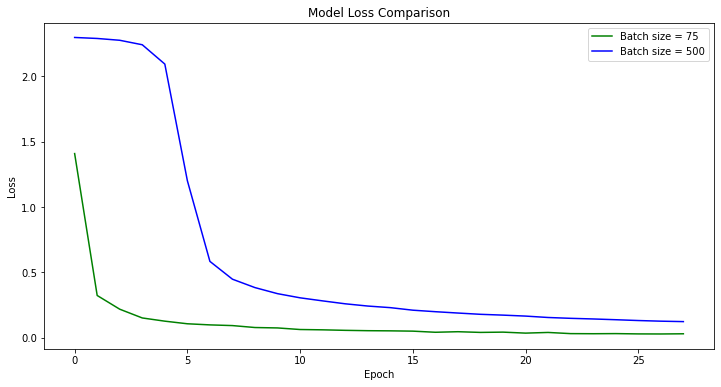

In [19]:
#Plot the graph for model loss
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color = "green")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color = "blue")
plt.title('Model Loss Comparison')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

PLOT FOR MODEL ACCURACY

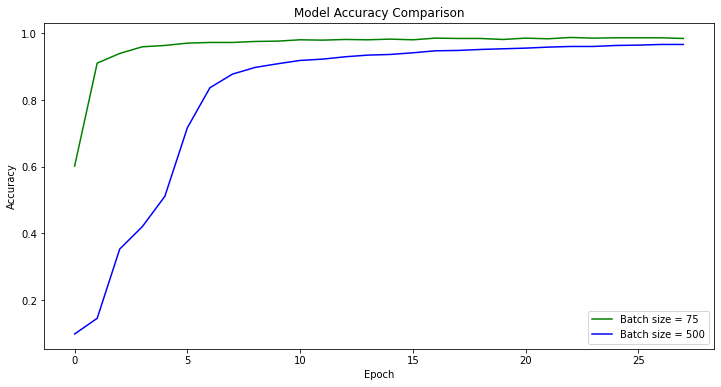

In [20]:
#Plot the graph for model accuracy
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b1, color = "green")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b2, color = "blue")
plt.title('Model Accuracy Comparison')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()